# init
@author: Alexandre Pereira Santos <br>
alexandre.santos(at)lmu.de

## Tasks
- get OpenStreetMap data using the osmnx functionalities in the Overpass API
- get boundary='administrative' and admin_level=10
- clip it to an AOI

## Prerequisites
- have osmnx and geopandas installed
- have an AOI saved as a vector (shapefile or geopackage)

In [1]:
import osmnx as ox
import geopandas as gpd
from pathlib import Path

# imports

In [7]:
#import the AOI
AOI_path = Path('../data/processed/')
AOI_file = 'LIM_rs_floods_2024_guaiba_bbox_A.shp'
AOI_gdf = gpd.read_file(AOI_path / AOI_file)

In [8]:
#bounds provides minx, miny, maxx, maxy
aoi_coords = AOI_gdf.to_crs(epsg='4326').envelope
bbox_df = gpd.GeoDataFrame(geometry=aoi_coords)
print('N',aoi_coords.bounds.values[0][3],'S',aoi_coords.bounds.values[0][1],'W',aoi_coords.bounds.values[0][0],'E',aoi_coords.bounds.values[0][2])

N -30.052223284 S -30.277323931 W -51.582733901 E -51.301150675


<Axes: >

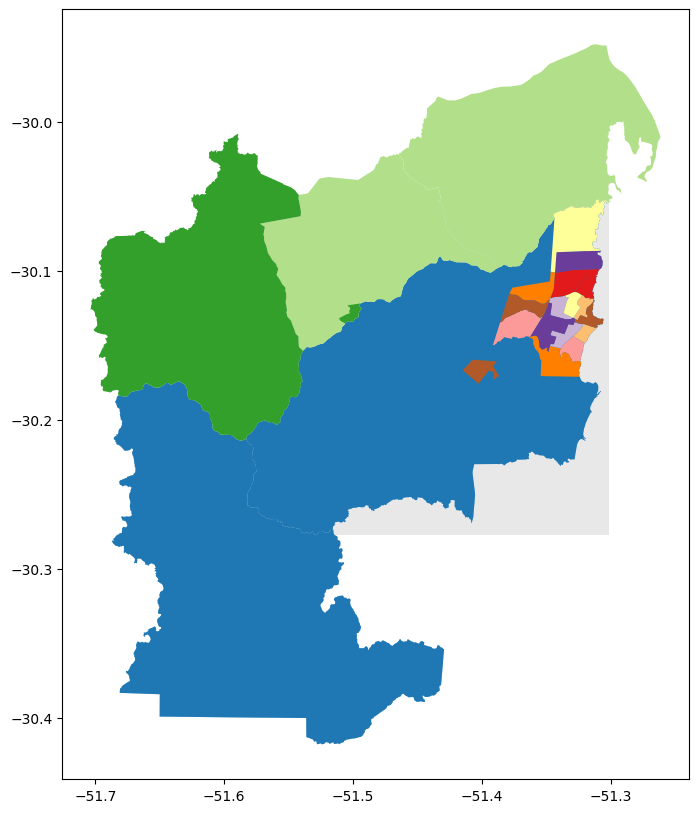

In [21]:
# get admin polygons for neighbourhoods in the AOI
# List key-value pairs for tags
# - get boundary='administrative' and admin_level=10
tags = {'boundary': ['administrative'], 'admin_level':['10']} # see https://wiki.openstreetmap.org/wiki/Key:place for more info
col_list = ['osmid','name','geometry', 'admin_level','place','surface'] #OSM has hundreds of cols, we just want a few. For info, check roads.columns'source',

places = ox.features_from_bbox(north=aoi_coords.bounds.values[0][3],
                              south=aoi_coords.bounds.values[0][1],
                              west=aoi_coords.bounds.values[0][0],
                              east=aoi_coords.bounds.values[0][2],
                              tags=tags)
places.reset_index(inplace=True)

#filtering out the wrong geometries (POLYGON or POINT) and element types (NODE)
places = places.loc[(places.geometry.type=='Polygon'), col_list] #&(places.element_type == 'way') 
#convert the CRS of roads to the same as AOI
places.to_crs(AOI_gdf.crs,inplace=True)

#plot them
places.plot(ax=AOI_gdf.plot(figsize=(10, 10),  alpha=0.5, color='lightgray'),cmap='Paired',  zorder=2) #linewidth=1,

In [22]:
places.columns
#.to_file('../data/processed/LIM_rs_floods_2024_guaiba_neighbourhoods_A.shp')

Index(['osmid', 'name', 'geometry', 'admin_level', 'place', 'surface'], dtype='object')

In [20]:
places.type.unique()

array(['Polygon'], dtype=object)

# export

In [23]:
#export places to a shapefile
places.to_file(AOI_path / 'LIM_rs_floods_2024_guaiba_neighbourhoods_A.shp')

C:\Users\ra42zek\AppData\Local\Temp\ipykernel_9996\143687791.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  places.to_file(AOI_path / 'LIM_rs_floods_2024_guaiba_neighbourhoods_A.shp')
